In [1]:
import os

import torch
import torchvision.transforms as T
from torch.utils.data import DataLoader

from dataset import LichtbogenDataset

import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
def coll_fn(x):
    inputs, labels = zip(*x)

    inputs = torch.stack(inputs, dim=0)

    labels = [{'boxes':l['boxes'], 'labels':l['labels']} for l in labels]

    return (inputs, labels)

In [3]:
root = '../retinanet_lichtbogen/lichtbogen_ds_coco'
dataset = LichtbogenDataset(root=os.path.join(root, 'data'), annotation=os.path.join(root, 'labels.json'), transforms=T.ToTensor())
dataloader = DataLoader(dataset, batch_size=1, collate_fn=coll_fn, num_workers=1)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [4]:
image, target = next(iter(dataloader))

In [5]:
target

[{'boxes': tensor([[521., 463., 684., 570.]]), 'labels': tensor([1])}]

In [6]:
box = target[0]['boxes']
x1, y1, x2, y2 = box[0,0], box[0,1], box[0,2], box[0,3]

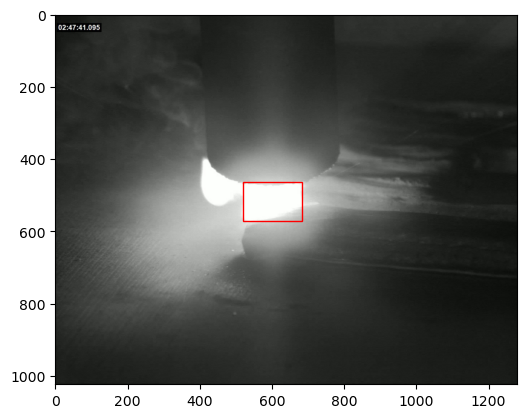

In [7]:
fig, ax = plt.subplots()
ax.imshow(image.swapaxes(1,2).swapaxes(2,3).squeeze())
rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

In [8]:
image.shape

torch.Size([1, 3, 1024, 1280])

In [9]:
factor = 4
image_ = T.Resize(round(1024/factor))(image)

In [10]:
x1_, y1_, x2_, y2_ = box[0,0]/factor, box[0,1]/factor, box[0,2]/factor, box[0,3]/factor

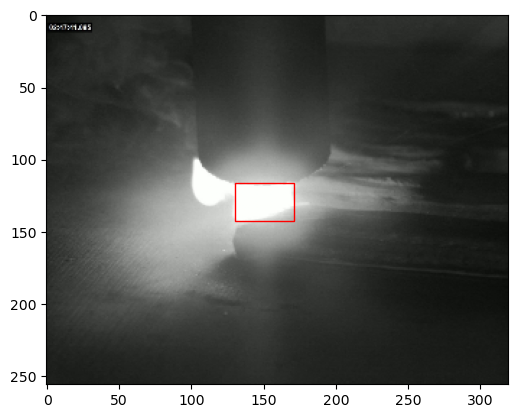

In [11]:
fig, ax = plt.subplots()
ax.imshow(image_.swapaxes(1,2).swapaxes(2,3).squeeze())
rect = patches.Rectangle((x1_, y1_), x2_ - x1_, y2_ - y1_, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)